In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [3]:
browser = webdriver.Chrome(options=options)

<html lang="en-US" dir="ltr"><head><meta http-equiv="origin-trial" content="A/kargTFyk8MR5ueravczef/wIlTkbVk1qXQesp39nV+xNECPdLBVeYffxrM8TmZT6RArWGQVCJ0LRivD7glcAUAAACQeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZzIiLCJleHBpcnkiOjE3NDIzNDIzOTksImlzU3ViZG9tYWluIjp0cnVlLCJpc1RoaXJkUGFydHkiOnRydWV9"><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-6VGGZHMLM2&amp;l=dataLayer&amp;cx=c" nonce=""></script><script type="text/javascript" async="" charset="utf-8" src="https://www.gstatic.com/recaptcha/releases/-ZG7BC9TxCVEbzIO2m429usb/recaptcha__en.js" crossorigin="anonymous" integrity="sha384-gaZtYaI7oJHEOo1YO6VuoCE4iZ5fMV9mYHP0BHf+r2ttABnpWWCIkgI6ItNW4ZdO" nonce=""></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-K59689F" nonce=""></script><script async="" src="https://www.google-analytics.com/analytics.js" nonce=""></script><base href="https://play.google.com/
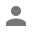
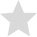
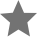
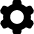
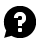
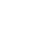
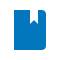
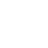
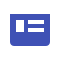
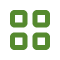
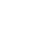
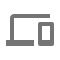
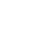
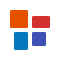
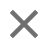
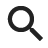
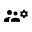
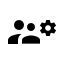
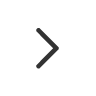
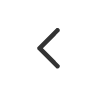
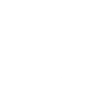
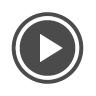
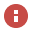
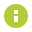
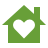
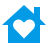
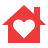
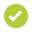
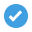
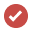

In [15]:
url = "https://play.google.com/store/games?device=windows"
browser.get(url)
print(browser.page_source)

In [16]:
element = browser.find_element(By.CLASS_NAME, 'j2FCNc')

In [17]:
print(element.text)

Mobile Legends: Bang Bang
Action
•
Strategy
3.9
star


In [94]:
all_row_games = browser.find_elements(By.CLASS_NAME, 'VfPpkd-EScbFb-JIbuQc')

In [97]:
print(all_row_games[0].text)

Mobile Legends: Bang Bang
Action
•
Strategy
3.9
star


In [119]:
game_name = []
game_type = []
game_rating = []

all_games = []

for game in all_row_games:
    single_game = game.text.split("\n")
    #print(single_game[4])

    game_name.append(single_game[0])
    game_type.append(single_game[1])
    rating = single_game[4] if len(single_game) > 3 else None
    #game_rating.append(single_game[3])

    game_dict = {
        "name" : single_game[0],
        "type" : single_game[1],
        "rating": rating
    }

    all_games.append(game_dict)
    

In [120]:
all_games

[{'name': 'Mobile Legends: Bang Bang', 'type': 'Action', 'rating': '3.9'},
 {'name': 'Gardenscapes', 'type': 'Puzzle', 'rating': '4.7'},
 {'name': 'Hungry Shark Evolution', 'type': 'Action', 'rating': '4.4'},
 {'name': '1945 US Air Force', 'type': 'Arcade', 'rating': '4.7'},
 {'name': 'Township', 'type': 'Simulation', 'rating': '4.7'},
 {'name': "Evony: The King's Return", 'type': 'Strategy', 'rating': '4.1'},
 {'name': 'Homescapes', 'type': 'Puzzle', 'rating': '4.7'},
 {'name': 'OTR - Offroad Car Driving Game', 'type': 'Racing', 'rating': '4.5'},
 {'name': 'Top Eleven Be a Soccer Manager', 'type': 'Sports', 'rating': '4.6'},
 {'name': 'Asphalt Legends Unite', 'type': 'Racing', 'rating': '4.4'},
 {'name': 'Bricks Breaker Quest', 'type': 'Arcade', 'rating': '4.4'},
 {'name': 'Rise of Kingdoms: Lost Crusade',
  'type': 'Strategy',
  'rating': '4.6'},
 {'name': 'State of Survival: Zombie War',
  'type': 'Strategy',
  'rating': '4.3'},
 {'name': 'Dragon Mania Legends', 'type': 'Adventure',

In [121]:
df = pd.DataFrame(all_games)
df

,name,type,rating
0,Mobile Legends: Bang Bang,Action,3.9
1,Gardenscapes,Puzzle,4.7
2,Hungry Shark Evolution,Action,4.4
3,1945 US Air Force,Arcade,4.7
4,Township,Simulation,4.7
5,Evony: The King's Return,Strategy,4.1
6,Homescapes,Puzzle,4.7
7,OTR - Offroad Car Driving Game,Racing,4.5
8,Top Eleven Be a Soccer Manager,Sports,4.6
9,Asphalt Legends Unite,Racing,4.4


In [122]:
import matplotlib.pyplot as plt

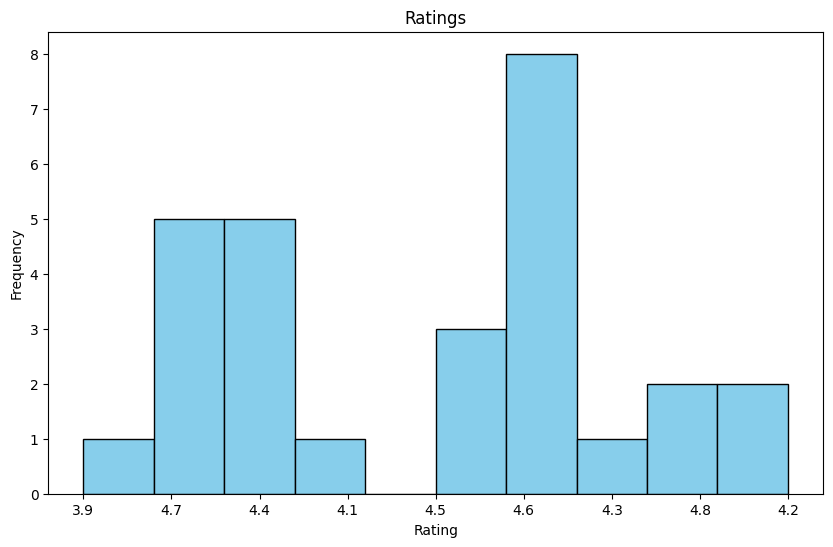

In [126]:
df_ratings = df.dropna(subset=['rating'])

plt.figure(figsize=(10, 6))
plt.hist(df_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [142]:
element = browser.find_element(By.CLASS_NAME, 'Si6A0c')

In [143]:
element.click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=130.0.6723.91)
Stacktrace:
	GetHandleVerifier [0x00007FF6DFAB3AF5+28005]
	(No symbol) [0x00007FF6DFA183F0]
	(No symbol) [0x00007FF6DF8B5639]
	(No symbol) [0x00007FF6DF906EDF]
	(No symbol) [0x00007FF6DF8F990E]
	(No symbol) [0x00007FF6DF92BA3A]
	(No symbol) [0x00007FF6DF8F9246]
	(No symbol) [0x00007FF6DF92BC50]
	(No symbol) [0x00007FF6DF94B8B3]
	(No symbol) [0x00007FF6DF92B7E3]
	(No symbol) [0x00007FF6DF8F75C8]
	(No symbol) [0x00007FF6DF8F8731]
	GetHandleVerifier [0x00007FF6DFDA646D+3118813]
	GetHandleVerifier [0x00007FF6DFDF6CC0+3448624]
	GetHandleVerifier [0x00007FF6DFDECF3D+3408301]
	GetHandleVerifier [0x00007FF6DFB7A44B+841403]
	(No symbol) [0x00007FF6DFA2344F]
	(No symbol) [0x00007FF6DFA1F4C4]
	(No symbol) [0x00007FF6DFA1F65D]
	(No symbol) [0x00007FF6DFA0EBB9]
	BaseThreadInitThunk [0x00007FFE32FF7374+20]
	RtlUserThreadStart [0x00007FFE34EDCC91+33]


In [130]:
print(new_url)

None
